<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
        </p></td></tr>
</table>


## Recreating Key Parts of the Cobb-Douglas Seminal Journal Article from 1928

This Jupyter Notebook aims to recreate and analyze key parts of the seminal journal article "A Theory of Production" by Charles W. Cobb and Paul H. Douglas, published in the American Economic Review in 1928. The article introduced the Cobb-Douglas production function, which has become a fundamental concept in economics.

### Overview

The Cobb-Douglas production function is a mathematical representation of the relationship between inputs (capital and labor) and output in the production process. The function is typically expressed as:
$$
Y = A \cdot K^\alpha \cdot L^\beta
$$

Where:

- \( Y \) is the total production (output),
- \( A \) is the total factor productivity,
- \( K \) is the capital input,
- \( L \) is the labor input,
- \( $\alpha$\) and \( $\beta$ \) are the output elasticities of capital and labor, respectively.
- In the simplified CD formulation \( $\alpha$\) + \( $\beta$ \) = 1

### Data and Analysis

**Dataset was manually compiled from the original article and is available in a csv file . The dataset contains historical data on labor, capital, and output for the United States from 1909 to 1929.**


In this notebook, we will:
1. Load and explore the historical data used by Cobb and Douglas.
2. Visualize the data to understand the trends in labor, capital, and output over time.
3. Estimate the parameters \( $\alpha$ \) and \( $A$ \) of the Cobb-Douglas production function using regression techniques.
4. Compare the predicted output values with the actual values to assess the model's accuracy.
5. Visualize the differences between the actual and predicted values.


### Steps

1. **Data Loading and Exploration**: We start by loading the historical data from a CSV file and exploring its structure.
2. **Data Visualization**: We create various plots to visualize the trends in labor, capital, and output over the years, seeking to make a plot that is reminiscent of the hand-drawn figure in the original article.
3. **Parameter Estimation**: Using regression techniques, we estimate the parameters \( \alpha \) and \( A \) of the Cobb-Douglas production function.
4. **Model Comparison**: We compare the predicted output values with the actual values and visualize the differences.

By following these steps, we aim to gain a deeper understanding of the Cobb-Douglas production function and its application to historical economic data.

**Please take a look at the original article for a more detailed explanation of the theory and methodology.**
From the 1928 Journal Article
https://www.jstor.org/stable/1811556


A Theory of Production
Charles W. Cobb, Paul H. Douglas
The American Economic Review, Vol. 18, No. 1, Supplement, Papers and Proceedings of the Fortieth Annual Meeting of the American Economic Association (Mar., 1928), pp. 139-165 (27 pages)

In [19]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import pandas as pd
%matplotlib inline


## Cobb Douglas graph of US Economic Output 1899-1922

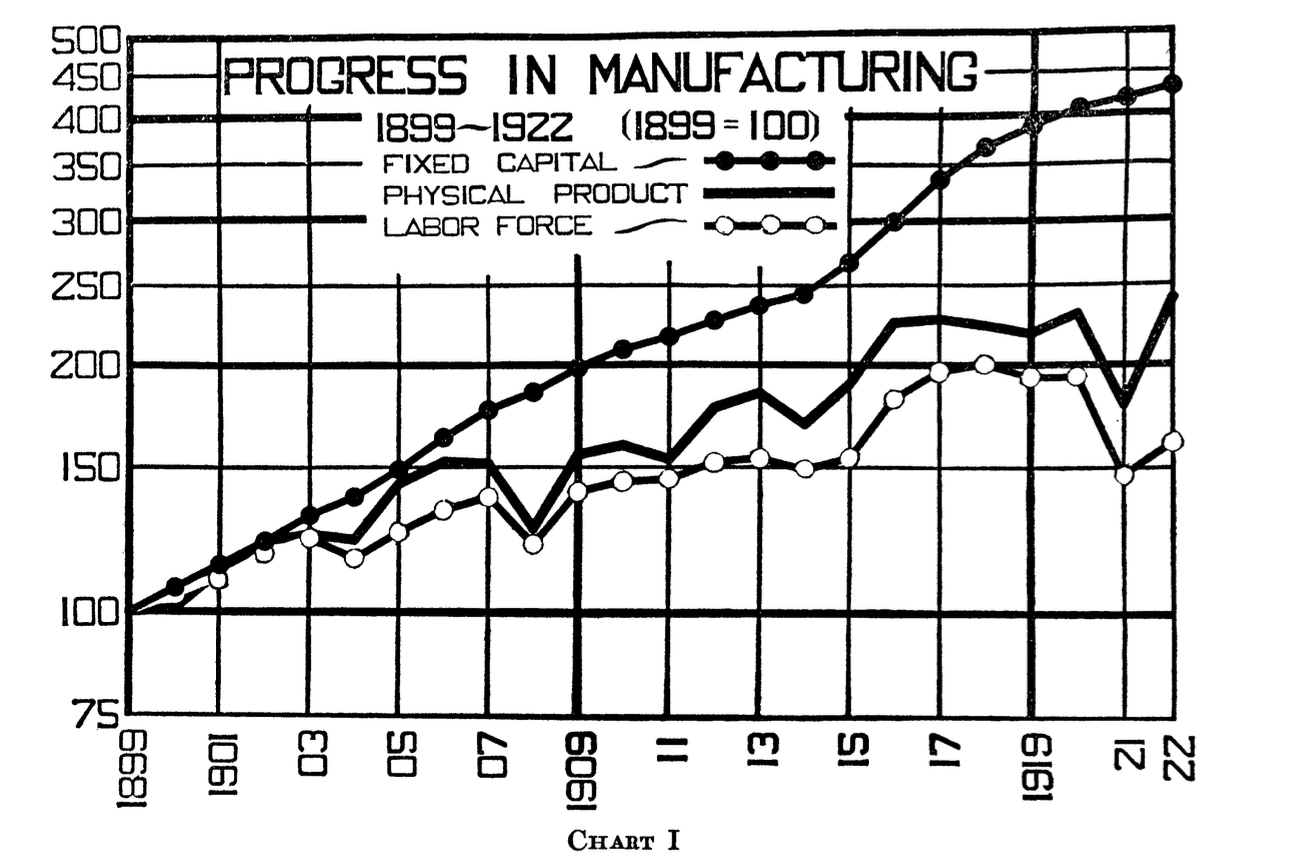






In [ ]:
cobbd = Table.read_table('Cobb.csv')
cobbd


Step 1 - A simple plot over time using the datascience commands

In [ ]:
cobbd.select('Year', 'EmplIndex', 'CapitalIndex', 'PhProdIndex').plot('Year')

Step 2- Making the Y-Axis a log-scale

In [ ]:
cobbd.select('Year', 'EmplIndex', 'CapitalIndex', 'PhProdIndex').plot('Year')

plt.yscale('log')

plt.show()

Step 3 - Changing properties for th  Y-Axis

In [ ]:
cobbd.select('Year', 'EmplIndex', 'CapitalIndex', 'PhProdIndex').plot('Year')


plt.yscale('log')

plt.gca().set_yticks([100, 200, 300, 400, 500])  # Set specific y-tick values
plt.gca().get_yaxis().set_major_formatter(mticker.ScalarFormatter())  # Format as scalar

plt.show()

Step 4 - *Try to make the plot look like the original !*
- Change the properties of the lines
- add Gridlines
- Title and Legend

In [ ]:
cobbd.select('Year', 'EmplIndex', 'CapitalIndex', 'PhProdIndex').plot('Year')

plt.yscale('log')

# Customize line styles
empl_line, = plt.plot(cobbd.column('Year'), cobbd.column('EmplIndex'), label='Labor Index', color='black', marker='o', markerfacecolor='white', linewidth=2)
capital_line, = plt.plot(cobbd.column('Year'), cobbd.column('CapitalIndex'), label='Capital Index', color='black', marker='o', linewidth=2)
phprod_line, = plt.plot(cobbd.column('Year'), cobbd.column('PhProdIndex'), label='Physical Product Index', color='black', linewidth=2)

plt.gca().set_yticks([75, 100, 200, 300, 400, 500])
plt.gca().get_yaxis().set_major_formatter(mticker.ScalarFormatter())

# Add gridlines in black and white
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')

# Customize title and labels
plt.title("PROGRESS IN MANUFACTURING \n 1899-1922  (1899=100)", fontsize=16)
plt.xlabel("Year", fontsize=14)

plt.legend([empl_line, capital_line, phprod_line], 
           ['LABOR FORCE', 'FIXED CAPITAL', 'PHYSICAL PRODUCT'],  # Legend labels
           loc='upper center',  # Move to center
           frameon=True)  # Optional: removes the legend box frame

plt.show()


##  Part 2 - Estimate Alpha and A
### Adding Columns for Ratios

1. **Add a Column for the Ratio of Capital to Labor:**
    - Use the variable names from the `cobbd` table.
    - Take the natural logarithms of the ratios
    - Add this as a new column to the `cobbd` table.

2. **Add a Column for the Ratio of Output to Labor:**
    - Use the variable names from the `cobbd` table.
    - Take the natural logarithms of the ratios
    - Add this as a new column to the `cobbd` table.




In [ ]:

cobbd = cobbd.with_column("ln(K/L)", np.log(cobbd.column("CapitalIndex")/cobbd.column("EmplIndex")))

cobbd = cobbd.with_column("ln(Y/L)", np.log(cobbd.column("PhProdIndex")/cobbd.column("EmplIndex")))
cobbd


### Estimating the Coefficients of the Cobb-Douglas Production Function

To estimate the coefficients of the Cobb-Douglas production function, we will use the `np.polyfit` function from the NumPy library. This function will help us perform a linear regression on the logarithmic ratios of capital to labor (\( \ln(K/L) \)) and output to labor (\( \ln(Y/L) \)).

The `log_ratios` table contains the necessary data for this estimation. By fitting a linear model to these logarithmic ratios, we can derive the coefficients \( \alpha \) and \( A \) of the Cobb-Douglas production function.

The steps involved are as follows:
1. Use `np.polyfit` to perform a linear regression on the `log_ratios` table.
2. Extract the coefficients from the regression output.
3. Interpret these coefficients in the context of the Cobb-Douglas production function.

This approach allows us to quantify the relationship between capital, labor, and output in the production process, providing valuable insights into the underlying economic dynamics.


In [26]:
CDestimates = np.polyfit(cobbd.column("ln(K/L)"), cobbd.column("ln(Y/L)"), 1)

In [27]:
alpha = CDestimates.item(0)
beta = 1-alpha
A = np.exp(CDestimates.item(1))

In [ ]:
print("alpha: ", alpha)
print("beta: ", beta)
print("A: ", A)


### Regression Analysis Using Statsmodels

In addition to using NumPy's `polyfit` function, we can also perform the regression analysis using the `statsmodels` library. This allows us to regress $ \ln(Y/L) $ on $\ln(K/L)$ and obtain detailed statistical information about the regression model.

The steps involved are as follows:
1. Use `statsmodels` to perform an Ordinary Least Squares (OLS) regression.
2. Compare the results with those obtained using `np.polyfit`.

This approach is beyond the scope of Data 8 but would be familiar to those who have taken an econometrics class


In [ ]:
import statsmodels.api as sm

sm.OLS(cobbd.column("ln(Y/L)"), sm.add_constant(cobbd.column("ln(K/L)"))).fit().summary()



In [ ]:
# get the coefficients for alpha from the statsmodels output
model = sm.OLS(cobbd.column("ln(Y/L)"), sm.add_constant(cobbd.column("ln(K/L)"))).fit()
alpha2 = model.params[1]
A2= np.exp(model.params[0])
print("alpha2: ", alpha2)
print("A2: ", A2)


What have we learned?
 - Np.polyfit returns the same output as statsmodels
 - Cobb-Douglas got the right result before computers had been invented

Now lets set this up to make  predictions for Y  and add that column to our table 
$$
A \cdot K^{\alpha} \cdot L^{1 - \alpha}
$$

or 
$$
1.01 \cdot K^{0.25} \cdot L^{0.75}
$$

or 
$$
1.01 \cdot K^{\frac{1}{4}} \cdot L^{\frac{1}{4}}
$$





In [ ]:

cobbd = cobbd.with_column("PredictedY", A*cobbd.column("CapitalIndex")**alpha*cobbd.column("EmplIndex")**(1-alpha))
cobbd

In [ ]:
# now we need a line plot the actual values of Y vs year and a pplot of predicted Y vs year 
cobbd.select('Year', 'PhProdIndex', 'PredictedY').plot('Year')

In [ ]:
# Let's add the difference between the actual and predicted values of Y to the cobbd table
cobbd = cobbd.with_column("Difference", cobbd.column("PhProdIndex") - cobbd.column("PredictedY") )
# lets add the percentage difference to the table which is actual - predicted / actual * 100
cobbd = cobbd.with_column("Percent Difference", cobbd.column("Difference")/cobbd.column("PhProdIndex")*100)
cobbd.show(24)

And if we plot this we can compare it to 'Chart IV' in the original paper ( page 155) 

In [ ]:
cobbd.select('Year', 'Difference').plot('Year')

In [ ]:
cobbd.select('Year', 'Difference').plot('Year')

# Add gridlines in black and white
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')

# Customize title and labels
plt.title("Percentage Deviations \n  of Computed from Actual Product\n  1899-1922", fontsize=16)
plt.xlabel("Year", fontsize=14)

 Not quite matching the graph in the article?

